# DATA TRANFORMATION

In [1]:
import pandas as pd

df = pd.read_csv('adult_with_headers (1).csv')
display(df.head())

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
for col in df.columns:
    print(f"Column '{col}': Unique values - {df[col].unique()}")

Column 'age': Unique values - [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Column 'workclass': Unique values - [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Column 'fnlwgt': Unique values - [ 77516  83311 215646 ...  34066  84661 257302]
Column 'education': Unique values - [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Column 'education_num': Unique values - [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Column 'marital_status': Unique values - [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Column 'occupation': Uni

In [3]:
import numpy as np

df.replace(' ?', np.nan, inplace=True)
print("Replaced ' ?' with NaN in the DataFrame.")
display(df.head())

Replaced ' ?' with NaN in the DataFrame.


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

print("Imputing numerical missing values with median...")
for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"  Filled missing values in '{col}' with median: {median_val}")

print("\nImputing categorical missing values with mode...")
for col in categorical_cols:
    if df[col].isnull().any():
        # Use .mode()[0] to get the first mode in case of multiple modes
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"  Filled missing values in '{col}' with mode: {mode_val}")

print("\nVerification of missing values after imputation:")
display(df.isnull().sum())

Imputing numerical missing values with median...

Imputing categorical missing values with mode...
  Filled missing values in 'workclass' with mode:  Private
  Filled missing values in 'occupation' with mode:  Prof-specialty
  Filled missing values in 'native_country' with mode:  United-States

Verification of missing values after imputation:


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [5]:
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

print("Imputing numerical missing values with median...")
for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)  # Changed to direct assignment
        print(f"  Filled missing values in '{col}' with median: {median_val}")

print("\nImputing categorical missing values with mode...")
for col in categorical_cols:
    if df[col].isnull().any():
        # Use .mode()[0] to get the first mode in case of multiple modes
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)  # Changed to direct assignment
        print(f"  Filled missing values in '{col}' with mode: {mode_val}")

print("\nVerification of missing values after imputation:")
display(df.isnull().sum())

Imputing numerical missing values with median...

Imputing categorical missing values with mode...

Verification of missing values after imputation:


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
X = df.drop('income', axis=1)
y = df['income']

print("Features (X) head:")
display(X.head())
print("\nTarget (y) head:")
display(y.head())

Features (X) head:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba



Target (y) head:


0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object

In [7]:
categorical_features = X.select_dtypes(include='object').columns
print(f"Categorical features identified: {list(categorical_features)}")

# Apply one-hot encoding
X = pd.get_dummies(X, columns=categorical_features, drop_first=False)

print("\nFeatures (X) after one-hot encoding:")
display(X.head())

# Re-identify numerical columns after one-hot encoding
numerical_features_for_scaling = X.select_dtypes(include=np.number).columns
print(f"\nNumerical features for scaling after one-hot encoding: {list(numerical_features_for_scaling)}")

Categorical features identified: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

Features (X) after one-hot encoding:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0



Numerical features for scaling after one-hot encoding: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'marital_status_ Divorced', 'marital_status_ Married-AF-spouse', 'marital_status_ Married-civ-spouse', 'marital_status_ Married-spouse-absent', 'marital_status_ Never-married', 'marital_status_ Separated', 'marital_status_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occ

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Apply StandardScaler
scaler_standard = StandardScaler()
X_scaled_standard = X.copy()
X_scaled_standard[numerical_features_for_scaling] = scaler_standard.fit_transform(X[numerical_features_for_scaling])

print("Features (X) after Standard Scaling:")
display(X_scaled_standard.head())

# Apply MinMaxScaler
scaler_minmax = MinMaxScaler()
X_scaled_minmax = X.copy()
X_scaled_minmax[numerical_features_for_scaling] = scaler_minmax.fit_transform(X[numerical_features_for_scaling])

print("\nFeatures (X) after Min-Max Scaling:")
display(X_scaled_minmax.head())

Features (X) after Standard Scaling:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,-0.174295,-0.262097,-0.014664,-1.747977,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,-0.174295,-0.262097,-0.014664,-1.747977,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,-0.174295,-0.262097,-0.014664,0.572090,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,-0.174295,-0.262097,-0.014664,0.572090,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,-0.174295,-0.262097,-0.014664,0.572090,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,-3.255119,-0.045408,-0.022173



Features (X) after Min-Max Scaling:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
print("Summary statistics for the DataFrame:")
display(df.describe(include='all'))

print("\nMissing values per column:")
display(df.isnull().sum())

print("\nData types of each column:")
display(df.dtypes)

Summary statistics for the DataFrame:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,24532,NaN,10501,NaN,14976,5983,13193,27816,21790,NaN,NaN,NaN,29753,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN



Missing values per column:


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


Data types of each column:


age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [10]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('income') # Exclude the target variable

one_hot_cols = []
label_encode_cols = []

for col in categorical_cols:
    if df[col].nunique() < 5:
        one_hot_cols.append(col)
    else:
        label_encode_cols.append(col)

print(f"Categorical columns for One-Hot Encoding (< 5 unique categories): {one_hot_cols}")
print(f"Categorical columns for Label Encoding (>= 5 unique categories): {label_encode_cols}")

Categorical columns for One-Hot Encoding (< 5 unique categories): ['sex']
Categorical columns for Label Encoding (>= 5 unique categories): ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']


In [11]:
from sklearn.preprocessing import LabelEncoder

print("DataFrame after Label Encoding:")
for col in label_encode_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    print(f"  Label encoded column '{col}'. Unique values: {df[col].nunique()}")

display(df.head())

DataFrame after Label Encoding:
  Label encoded column 'workclass'. Unique values: 8
  Label encoded column 'education'. Unique values: 16
  Label encoded column 'marital_status'. Unique values: 7
  Label encoded column 'occupation'. Unique values: 14
  Label encoded column 'relationship'. Unique values: 6
  Label encoded column 'race'. Unique values: 5
  Label encoded column 'native_country'. Unique values: 41


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,9,13,4,0,1,4,Male,2174,0,40,38,<=50K
1,50,5,83311,9,13,2,3,0,4,Male,0,0,13,38,<=50K
2,38,3,215646,11,9,0,5,1,4,Male,0,0,40,38,<=50K
3,53,3,234721,1,7,2,5,0,2,Male,0,0,40,38,<=50K
4,28,3,338409,9,13,2,9,5,2,Female,0,0,40,4,<=50K


In [12]:
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=False)
print("DataFrame after One-Hot Encoding:")
display(df.head())

DataFrame after One-Hot Encoding:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male
0,39,6,77516,9,13,4,0,1,4,2174,0,40,38,<=50K,0,1
1,50,5,83311,9,13,2,3,0,4,0,0,13,38,<=50K,0,1
2,38,3,215646,11,9,0,5,1,4,0,0,40,38,<=50K,0,1
3,53,3,234721,1,7,2,5,0,2,0,0,40,38,<=50K,0,1
4,28,3,338409,9,13,2,9,5,2,0,0,40,4,<=50K,1,0


In [13]:
df['age_work_interaction'] = df['age'] * df['hours_per_week']
df['capital_total'] = df['capital_gain'] + df['capital_loss']

print("DataFrame with new features:")
display(df.head())

DataFrame with new features:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male,age_work_interaction,capital_total
0,39,6,77516,9,13,4,0,1,4,2174,0,40,38,<=50K,0,1,1560,2174
1,50,5,83311,9,13,2,3,0,4,0,0,13,38,<=50K,0,1,650,0
2,38,3,215646,11,9,0,5,1,4,0,0,40,38,<=50K,0,1,1520,0
3,53,3,234721,1,7,2,5,0,2,0,0,40,38,<=50K,0,1,2120,0
4,28,3,338409,9,13,2,9,5,2,0,0,40,4,<=50K,1,0,1120,0


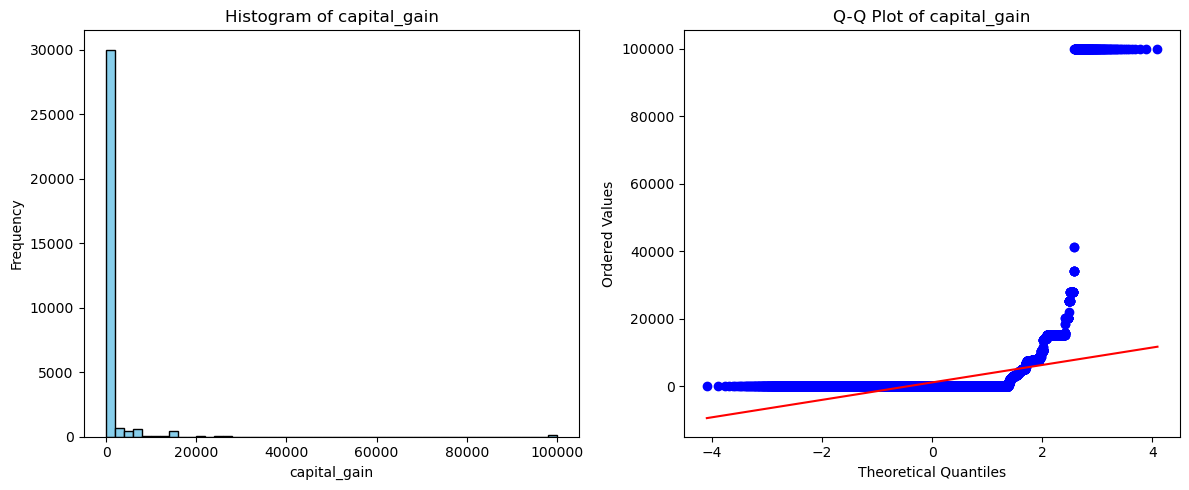

In [14]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Choose a numerical feature that appears skewed
skewed_feature = 'capital_gain'

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Subplot 1: Histogram
plt.subplot(1, 2, 1)
plt.hist(df[skewed_feature], bins=50, color='skyblue', edgecolor='black')
plt.title(f'Histogram of {skewed_feature}')
plt.xlabel(skewed_feature)
plt.ylabel('Frequency')

# Subplot 2: Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(df[skewed_feature], dist="norm", plot=plt)
plt.title(f'Q-Q Plot of {skewed_feature}')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

# Display plots
plt.tight_layout()
plt.show()


Displaying distribution after log transformation for 'capital_gain':


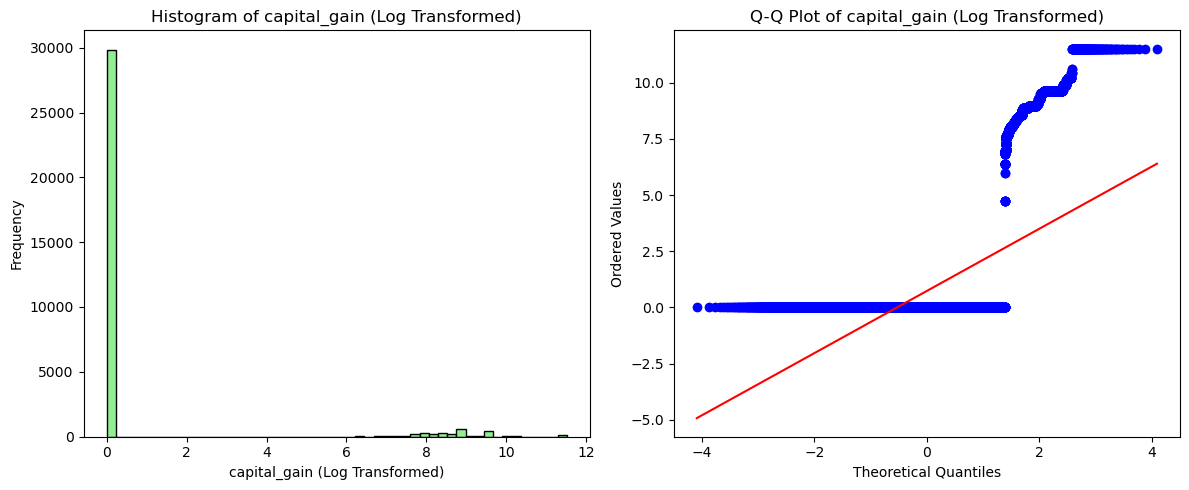

In [15]:
feature_to_transform = 'capital_gain'

# Apply log transformation (np.log1p handles zero values by adding 1 before taking the log)
df[f'{feature_to_transform}_log_transformed'] = np.log1p(df[feature_to_transform])

print(f"Displaying distribution after log transformation for '{feature_to_transform}':")

# Create a figure with two subplots for the transformed feature
plt.figure(figsize=(12, 5))

# Subplot 1: Histogram of transformed feature
plt.subplot(1, 2, 1)
plt.hist(df[f'{feature_to_transform}_log_transformed'], bins=50, color='lightgreen', edgecolor='black')
plt.title(f'Histogram of {feature_to_transform} (Log Transformed)')
plt.xlabel(f'{feature_to_transform} (Log Transformed)')
plt.ylabel('Frequency')

# Subplot 2: Q-Q plot of transformed feature
plt.subplot(1, 2, 2)
stats.probplot(df[f'{feature_to_transform}_log_transformed'], dist="norm", plot=plt)
plt.title(f'Q-Q Plot of {feature_to_transform} (Log Transformed)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

# Display plots
plt.tight_layout()
plt.show()